**Artificial intelligence and Machine Learning Project**

- The dataset used in this project, *euphoria.csv*, contains features related to islands in a virtual world, including happiness levels, amenities, and geographical information. The goal of this project is to build and evaluate machine learning models to predict the happiness index of the islands and analyze the model performance. In this file, we will preprocess the data, train models, and find a model that performs best.

- This code imports essential libraries and tools for data analysis, visualization, preprocessing, and machine learning, including NumPy, pandas, matplotlib, seaborn, and sklearn modules. It then reads the *euphoria.csv* dataset into a pandas DataFrame, setting the foundation for exploring, processing, and modeling the data using techniques like scaling, encoding, regression, and hyperparameter tuning.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
from tabulate import tabulate
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

file_path = "euphoria.csv"
df = pd.read_csv(file_path)

**EDA Analysis and Data preprocessing**
- We will use this EDA to understand the dataset, summarize the main characteristics and visualize it.

*1.Loading the dataset to have an initial overview*

-We display column information, it prints the names of the columns and their corresponding data types, providing an overview of the dataset's structure.  
-Then, we show the first five rows, it prints the first five rows of the dataset to give a quick preview of the data and its content, helping to understand its initial structure and values.  

In [5]:
print("\nColumn Names and Data Types:")
print(df.dtypes)
print("\nFirst 5 Rows of the Dataset:")
print(df.head())


Column Names and Data Types:
referral_friends           float64
water_sources              float64
shelters                   float64
fauna_friendly              object
island_size                float64
creation_time              float64
region                      object
happiness_metric            object
features                    object
happiness_index            float64
loyalty_score              float64
total_refunds_requested    float64
trade_goods                 object
x_coordinate               float64
avg_time_in_euphoria       float64
y_coordinate               float64
island_id                  float64
entry_fee                   object
nearest_city                object
dtype: object

First 5 Rows of the Dataset:
   referral_friends  water_sources  shelters fauna_friendly  island_size  \
0               3.0            2.0       2.0      Cats,Dogs        892.0   
1               2.0            2.0       3.0            NaN       1322.0   
2               2.0            2.

-First, we can see that the dataset contains two main types of variables:

-Numerical Variables: These include continuous data represented as float64, such as referral_friends, water_sources, and loyalty_score. These variables can be directly used for analysis or modeling after normalization or standardization if required.

-Categorical Variables: These are non-numerical variables represented as object, such as fauna_friendly, region, and happiness_metric.
-Second, we observe that features such as referral_friends, water_sources, shelters, and fauna_friendly represent different attributes of the data. fauna_friendly appears to be a multi-value categorical column. Many rows contain NaN values, which indicates missing data that needs to be handled. The dataset has a mix of numerical (referral_friends, happiness_index) and categorical features (region, entry_fee).
Potential target variables might include happiness_index or happiness_metric.

*2.Showing the dimension of the dataset* 

In [6]:
print("Dataset Dimensions (Rows, Columns):", df.shape)

Dataset Dimensions (Rows, Columns): (99492, 19)


We can see that the dataset has 19 columns and 99492 rows.

*2.Droppin unnecesary columns*

-Because our dataset is large we want to drop any columns that are not useful for our analysis or model building.

-We aim to predict or understand the happiness index of the islands. Columns that do not contribute to predicting or understanding this target variable or contain irrelevant information can be dropped.

-creation_time - This is a timestamp, and we aren't planning to do time-based analysis so it can be removed.

-entry_fee - It represents a constant value, it's likely not useful for analysis and can be dropped.

-nearest_city - It's a categorical column with potentially high cardinality (many unique cities). It may not directly affect happiness levels unless explicitly linked to the analysis.

-trade_goods - The column trade_goods seems to have only one unique value ("USD"), which is not useful for the analysis or predictive modeling, so it can be removed.

In [7]:
columns_to_drop = ['creation_time', 'entry_fee', 'nearest_city', 'trade_goods']
df_cleaned = df.drop(columns=columns_to_drop)
cleaned_file_path = "cleaned_euphoria.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Columns dropped: {columns_to_drop}")

Columns dropped: ['creation_time', 'entry_fee', 'nearest_city', 'trade_goods']


*3.Visualize missing data*

-We check and visualize missing data so that we can handle it and also drop the unnecessary columns.


Missing Values Summary:
referral_friends            9920
water_sources               9956
shelters                   10110
fauna_friendly             64329
island_size                 9914
region                     10186
happiness_metric            9926
features                   24457
happiness_index            10037
loyalty_score               9946
total_refunds_requested     9787
x_coordinate               10001
avg_time_in_euphoria        9966
y_coordinate               10099
island_id                   9972
dtype: int64


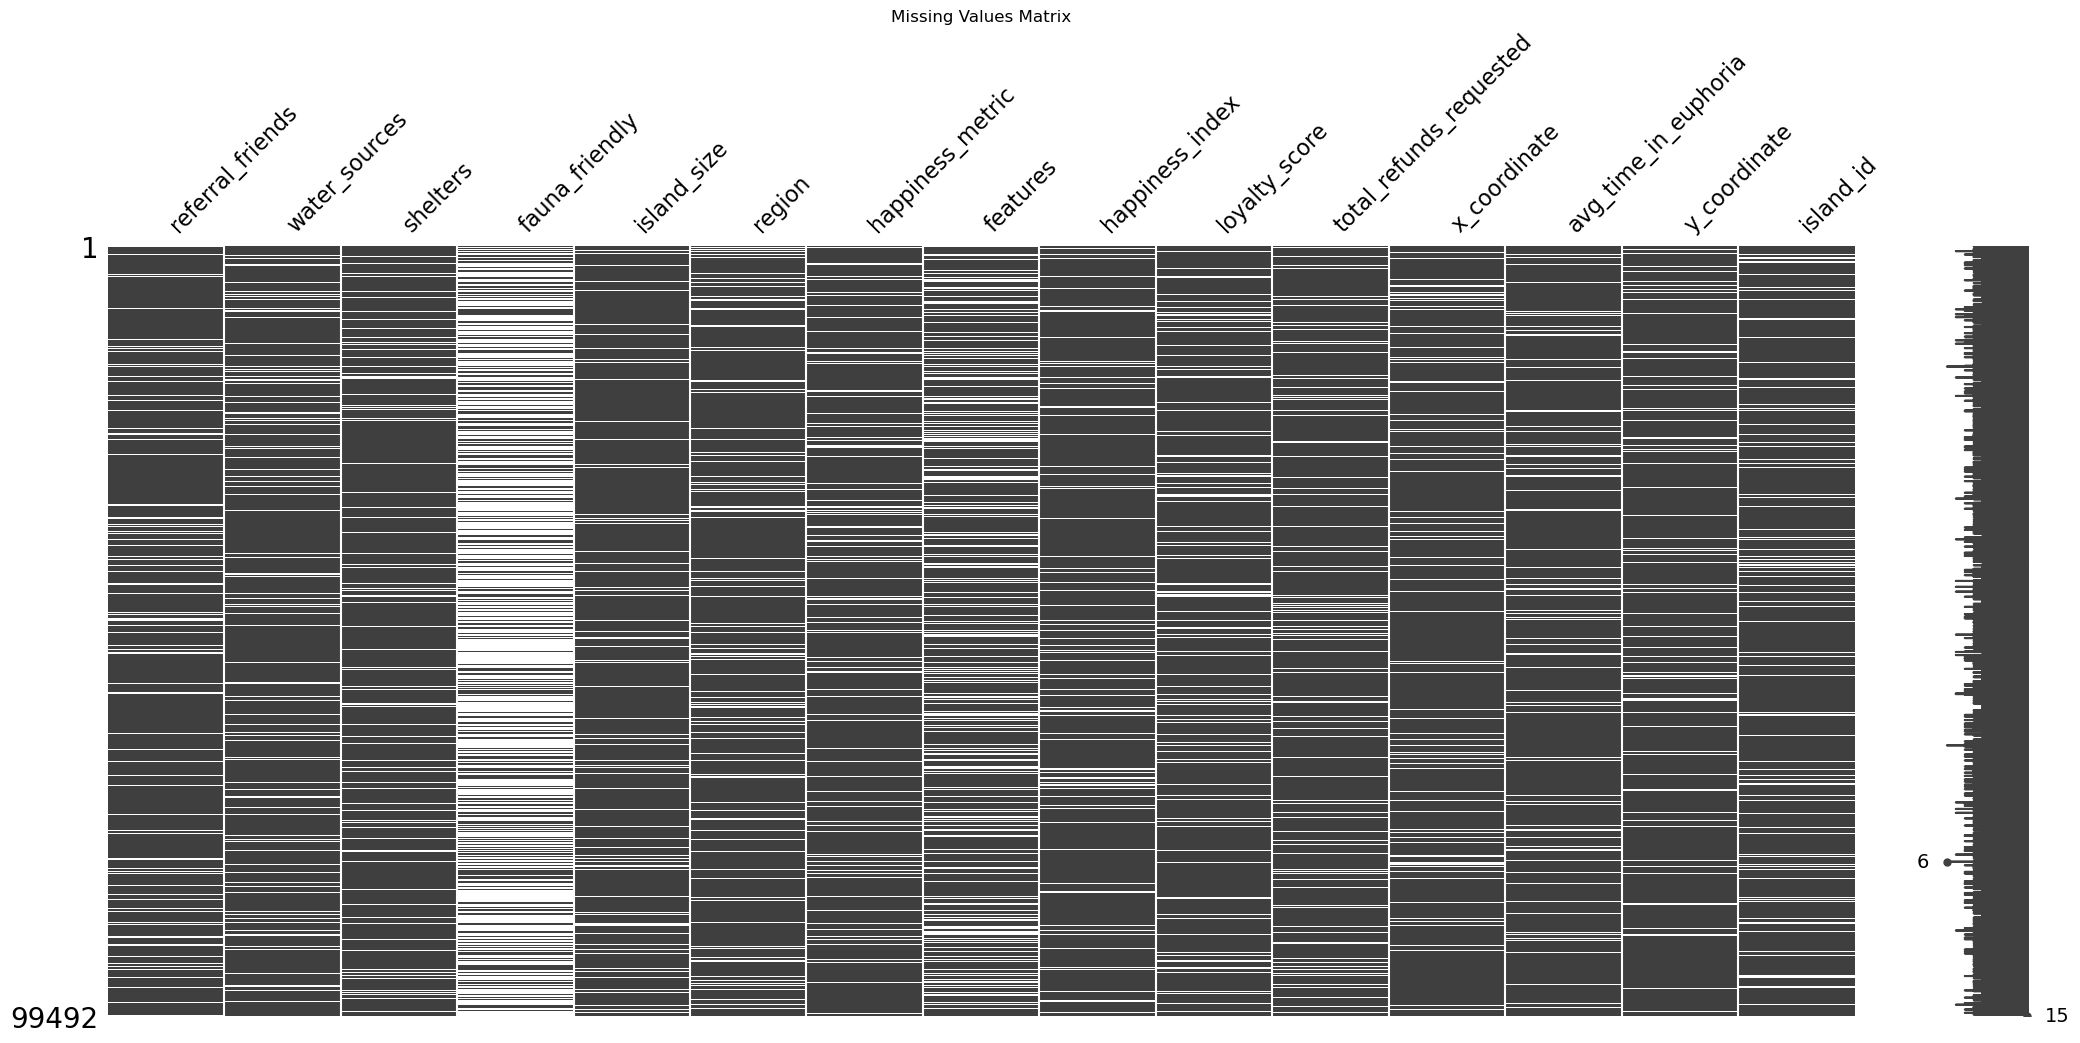

In [8]:
file_path = "cleaned_euphoria.csv"
data_cleaned = pd.read_csv(file_path)

print("\nMissing Values Summary:")
print(data_cleaned.isnull().sum())
msno.matrix(data_cleaned)
plt.title("Missing Values Matrix")
plt.show()

-Next, there are notable levels of missing data in several columns, including referral_friends, water_sources, and shelters. While these columns do not have as severe a level of missing data as others, their missing values should still be addressed during data cleaning.

-Additionally, columns like region and happiness_metric also have missing data, but the missing values is relatively moderate.

-Columns like happiness_index  and loyalty_score also exhibit missing data, but again, the percentage is low enough that imputation strategies can be used without significant risk of data distortion.

-However we notice that fauna_friendly has a lot of missing values, so that needs to be handled.

*4.Dropping columns with too much missing values*
-To determine which columns should be dropped because they have too many missing values and which should be kept, we use a threshold for the percentage of missing values.

-If a column has more than 50% missing values, it might not provide enough useful information to the model, and we consider dropping it.

-If a column has less than 50% missing values, it may be worth keeping, and we can handle the missing values.

In [9]:
missing_percentage = (data_cleaned.isnull().sum() / len(data_cleaned)) * 100
print("\nPercentage of Missing Values per Column:")
print(missing_percentage)


Percentage of Missing Values per Column:
referral_friends            9.970651
water_sources              10.006835
shelters                   10.161621
fauna_friendly             64.657460
island_size                 9.964620
region                     10.238009
happiness_metric            9.976682
features                   24.581876
happiness_index            10.088248
loyalty_score               9.996784
total_refunds_requested     9.836972
x_coordinate               10.052064
avg_time_in_euphoria       10.016886
y_coordinate               10.150565
island_id                  10.022916
dtype: float64


Based on the missing values summary provided, only fauna_friendly will be dropped because it has 64% of missing data.

In [10]:
data_cleaned = data_cleaned.drop(columns=['fauna_friendly'])
data_cleaned.to_csv("cleaned_euphoria.csv", index=False)

*Univariate analysis*

*5.Histogram for numerical features*

-We create histograms for all numerical columns in the dataset to visualize the distribution of each feature, to help us identify patterns such as skewness, normality, or outliers. This highlights the range of values for each numerical feature.

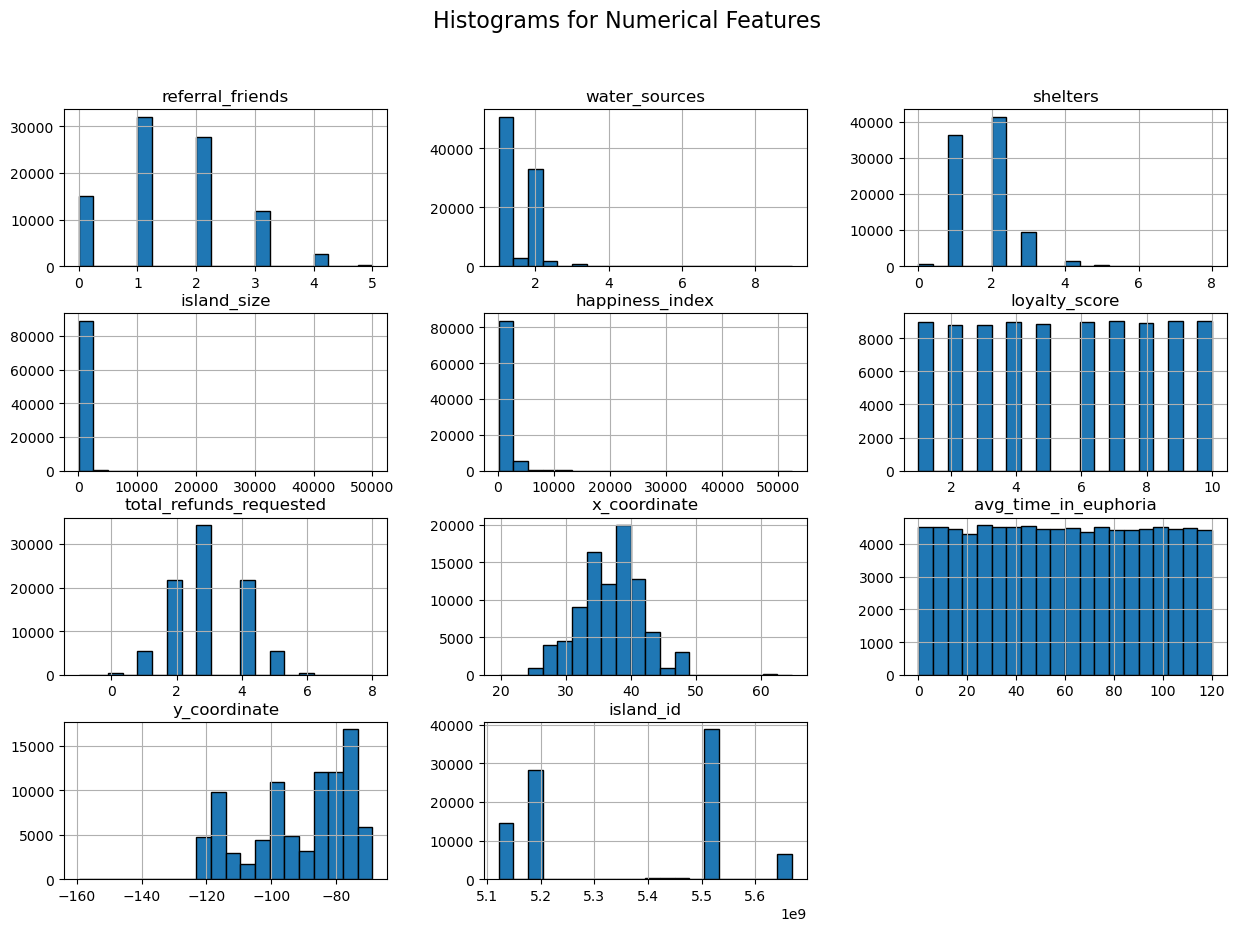

In [11]:
numerical_data_cleaned = data_cleaned.select_dtypes(include=['float64', 'int64'])
numerical_data_cleaned.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms for Numerical Features", fontsize=16)
plt.show()

Loyalty score and average time in euphoria does not provide us with any relevant information in this dataset so we can remove them.

In [12]:
data_cleaned = data_cleaned.drop(columns=['loyalty_score', 'avg_time_in_euphoria'])
data_cleaned.to_csv("cleaned_euphoria.csv", index=False)

*6.Value counts for categorical features*

-This will print the frequency of each category for the selected categorical columns (region, happiness_metric, features) 
-This part will provide insight into whether the categories are balanced or imbalanced.


Value Counts for region:
region
TX    10131
CA     9284
VA     7411
NC     5721
CO     5685
FL     5216
MD     4766
MA     4560
OH     4409
GA     4298
NJ     3982
NV     2513
WA     2328
AZ     2144
LA     1193
MO     1070
PA     1012
TN      986
IL      928
KY      912
NE      906
OK      829
KS      828
SC      823
UT      718
NH      667
ND      658
MI      643
NY      593
AR      543
MN      519
CT      466
IN      460
WI      400
IA      321
AL      314
OR      246
VT      114
RI      110
MS       99
ID       87
DC       82
MT       81
SD       81
AK       54
ME       31
HI       29
NM       23
WY       15
WV       11
DE        6
Name: count, dtype: int64


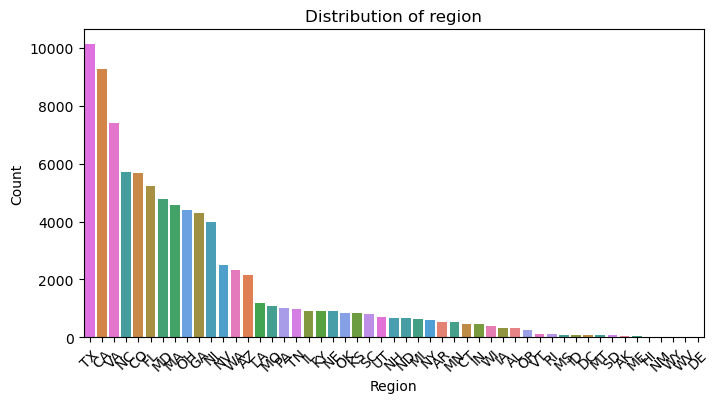


Value Counts for happiness_metric:
happiness_metric
Monthly    89564
Weekly         2
Name: count, dtype: int64


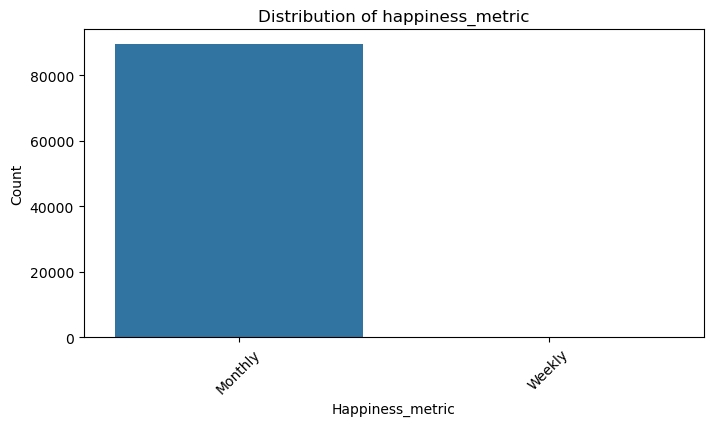


Value Counts for features:
features
Parking                                                                                                                             5605
Parking,Storage                                                                                                                     1892
Gym,Pool                                                                                                                            1685
Pool                                                                                                                                1333
Gym,Parking,Pool                                                                                                                    1057
                                                                                                                                    ... 
AC,Gym,Hot Tub,Patio/Deck,Washer Dryer,Wood Floors                                                                                     1
Club

In [16]:
file_path = "cleaned_euphoria.csv"
data_cleaned = pd.read_csv(file_path)
categorical_features = ['region', 'happiness_metric', 'features']
df[categorical_features] = df[categorical_features].astype('category')

for col in categorical_features:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())

    if col in ['region', 'happiness_metric']:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=col, dodge=False, legend=False)
        plt.title(f"Distribution of {col}")
        plt.ylabel("Count")
        plt.xlabel(col.capitalize())
        plt.xticks(rotation=45)
        plt.show()


-The happiness_metric column has an extreme imbalance: "Monthly" is overwhelmingly dominant with 89,564 instances, while "Weekly" appears only twice. This extreme skew could indicate either a data entry issue or that the "Weekly" metric is underrepresented in the dataset, so we will visualize the distribution to check and confirm whether it is skewed.

-Visualizing the distribution of features now would be of no use because of its volume, so we will do that later when we deal with the column.

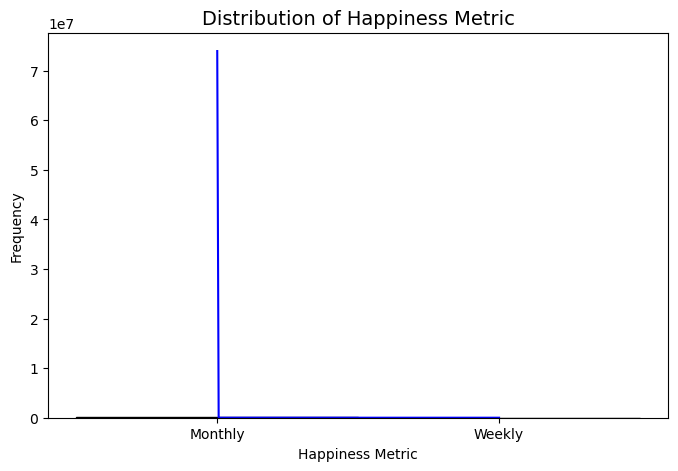

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['happiness_metric'], kde=True, color='blue', bins=30)
plt.title("Distribution of Happiness Metric", fontsize=14)
plt.xlabel("Happiness Metric")
plt.ylabel("Frequency")
plt.show()

In [18]:
print(df['happiness_metric'].value_counts())

happiness_metric
Monthly    89564
Weekly         2
Name: count, dtype: int64


-The output shows that the happiness_metric column is overwhelmingly dominated by the value "Monthly" with just 2 occurrences of "Weekly." This indicates an extreme imbalance in the data for this column. It is not meaningful to treat this as a numeric or continuous variable, nor is it appropriate to transform it for skewness.

-The column provides very little information for modeling or analysis, as it doesn't differentiate between most islands.

-We will drop it because it does not contribute to the dataset



In [19]:
data_cleaned = data_cleaned.drop(columns=['happiness_metric'])
updated_file_path = "cleaned_euphoria.csv"
data_cleaned.to_csv(updated_file_path, index=False)

*7.Information and statistics*

-This is just a short overview of the dataset up to now, providing a snapshot of the dataset to determine next steps in cleaning or processing.

In [47]:
print("\nDataset Information:")
data_cleaned.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   referral_friends         89572 non-null  float64
 1   water_sources            89536 non-null  float64
 2   shelters                 89382 non-null  float64
 3   island_size              89578 non-null  float64
 4   region                   89306 non-null  object 
 5   features                 75035 non-null  object 
 6   happiness_index          89455 non-null  float64
 7   total_refunds_requested  89705 non-null  float64
 8   x_coordinate             89491 non-null  float64
 9   y_coordinate             89393 non-null  float64
 10  island_id                89520 non-null  float64
dtypes: float64(9), object(2)
memory usage: 8.3+ MB


-The dataset contains 99,492 rows and 12 columns. The data types include float64 for numerical columns and category for categorical columns.

-The presence of both numerical and categorical data suggests that the dataset is ready for preprocessing steps,like handling missing values, encoding categorical features and feature scalling.

In [20]:
print("\nSummary Statistics of Dataset:")
print(data_cleaned.describe())


Summary Statistics of Dataset:
       referral_friends  water_sources      shelters   island_size  \
count      89572.000000   89536.000000  89382.000000  89578.000000   
mean           1.501172       1.445240      1.727977    956.647938   
std            1.027314       0.547157      0.749502    423.548977   
min            0.000000       1.000000      0.000000    101.000000   
25%            1.000000       1.000000      1.000000    728.000000   
50%            1.000000       1.000000      2.000000    900.000000   
75%            2.000000       2.000000      2.000000   1115.000000   
max            5.000000       9.000000      8.000000  50000.000000   

       happiness_index  total_refunds_requested  x_coordinate  y_coordinate  \
count     89455.000000             89705.000000  89491.000000  89393.000000   
mean       1527.617361                 3.000167     36.942206    -91.576548   
std         896.880412                 1.038751      4.599133     15.816956   
min         100.00000

-The summary statistics of the dataset reveal a wide range of values across several features, indicating some variability in island characteristics. For example, the island_size and happiness_index columns show significant outliers, with a few islands having extremely high values that may need further investigation for potential data issues. The referral_friends, water_sources, and shelters columns are relatively consistent, with most islands having values between 1 and 2, suggesting a common trend in island characteristics. The presence of negative values in total_refunds_requested indicates potential data entry errors, which should be addressed. Overall, while the dataset contains useful information, handling outliers, negative values, and extreme skewness in some features will be important for any subsequent analysis or modeling.

*Dropping rows where happines index is missing*

-Because happiness_index is our target column and rows that are missing happines index should be dropped because they are of no use to us.

-The happiness_index is the target variable for training predictive models. If this value is missing, we can't use that row for supervised learning since the model needs the target to learn patterns, and we should not impute missing values for the target variable since it is risky and often inaccurate because it introduces bias or noise into the dataset. Predicting the happiness_index to fill the missing values can create a circular dependency when using the same dataset for both training and imputation.

In [21]:
df_cleaned = pd.read_csv("cleaned_euphoria.csv")
df_cleaned = df_cleaned.dropna(subset=['happiness_index'])
df_cleaned.to_csv("cleaned_euphoria.csv", index=False)
print("Rows with missing 'happiness_index' have been dropped.")
print("New dataset shape:", df_cleaned.shape)

Rows with missing 'happiness_index' have been dropped.
New dataset shape: (89455, 11)


*7.Encoding categorical features*
-Categorical features are converted into numerical values using label encoding, the dataset becomes compatible with machine learning models that require numerical input.

But the features column has a lot of information and if we encode it with label encoding we will lose that information, so instead before the encoding we will:

-Group the amenities into broader categories based on their type, like basic amenities, luxury features, connectivity features, appliances, building features.

-Instead of creating a column for every unique combination, we will use these groups and encode them into binary columns.

-After encoding, we will drop the original features column.

-Then process with encoding of the other categorical features.

In [22]:
df_cleaned = pd.read_csv("cleaned_euphoria.csv")
feature_groups = {
    'Basic Amenities': ['Parking', 'Pool', 'Patio/Deck', 'Storage', 'Elevator'],
    'Luxury Features': ['Gym', 'Clubhouse', 'Tennis', 'Fireplace', 'Hot Tub', 'View'],
    'Connectivity Features': ['Internet Access', 'Cable or Satellite', 'TV'],
    'Appliances': ['Dishwasher', 'Refrigerator', 'Washer Dryer', 'Garbage Disposal'],
    'Building Features': ['Gated', 'Doorman', 'Wood Floors']
}
def encode_features_group(row, group_features):
    if isinstance(row, str):
        return any(feature in row for feature in group_features)
    return False
for group_name, features in feature_groups.items():
    df_cleaned[group_name] = df_cleaned['features'].apply(lambda x: encode_features_group(x, features))
df_cleaned.drop(columns=['features'], inplace=True)
df_cleaned.to_csv("cleaned_euphoria.csv", index=False)
print(df_cleaned.head())

   referral_friends  water_sources  shelters  island_size region  \
0               3.0            2.0       2.0        892.0     TX   
1               2.0            2.0       3.0       1322.0     PA   
2               2.0            2.0       NaN       1204.0     NV   
3               1.0            1.0       1.0        558.0    NaN   
4               1.0            NaN       NaN        670.0     CA   

   happiness_index  total_refunds_requested  x_coordinate  y_coordinate  \
0           1014.0                      1.0       32.8239      -96.6810   
1           2700.0                      3.0       39.9388      -75.1826   
2           1084.0                      3.0       36.1721     -115.0590   
3            850.0                      3.0           NaN      -96.7916   
4           1500.0                      4.0       33.9410     -117.9544   

      island_id  Basic Amenities  Luxury Features  Connectivity Features  \
0  5.508811e+09             True             True               

In [23]:
df_cleaned = pd.read_csv("cleaned_euphoria.csv")
categorical_features = df_cleaned.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_features:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
df_cleaned.to_csv("cleaned_euphoria.csv", index=False)
print(df_cleaned.head())

   referral_friends  water_sources  shelters  island_size  region  \
0               3.0            2.0       2.0        892.0      43   
1               2.0            2.0       3.0       1322.0      38   
2               2.0            2.0       NaN       1204.0      33   
3               1.0            1.0       1.0        558.0      51   
4               1.0            NaN       NaN        670.0       4   

   happiness_index  total_refunds_requested  x_coordinate  y_coordinate  \
0           1014.0                      1.0       32.8239      -96.6810   
1           2700.0                      3.0       39.9388      -75.1826   
2           1084.0                      3.0       36.1721     -115.0590   
3            850.0                      3.0           NaN      -96.7916   
4           1500.0                      4.0       33.9410     -117.9544   

      island_id  Basic Amenities  Luxury Features  Connectivity Features  \
0  5.508811e+09             True             True         

-The dataset now contains numerical values in place of the previously categorical features, as they have been encoded using Label Encoding. Categorical features such as region and features have been transformed into integers, reflecting their unique categories. However, there are still missing values in some columns (e.g., shelters, features, x_coordinate), and these need to be handled separately.

*8.Handling missing values*
-We need to ensure that missing values are handled to ensure that the dataset is ready for analysis. The KNN imputation technique fills missing values based on the similarity of data points, making it more advanced than simple median or mode imputation.

-But first we need to scale the data KNN Imputer uses distance metrics to find the "nearest neighbors" for filling in missing values. If the features are not scaled, the features with larger numeric ranges will dominate the distance calculation, potentially leading to biased imputations. After the KNN imputer handles the missing values, we will reverse the scalling to continue.

In [24]:
from sklearn.impute import KNNImputer

df_cleaned = pd.read_csv("cleaned_euphoria.csv")
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numerical_cols])

knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)

imputed_data = scaler.inverse_transform(imputed_data)
df_cleaned[numerical_cols] = imputed_data

print("\nMissing Values After Imputation:")
print(df_cleaned.isnull().sum())

df_cleaned.to_csv("cleaned_euphoria.csv", index=False)


Missing Values After Imputation:
referral_friends           0
water_sources              0
shelters                   0
island_size                0
region                     0
happiness_index            0
total_refunds_requested    0
x_coordinate               0
y_coordinate               0
island_id                  0
Basic Amenities            0
Luxury Features            0
Connectivity Features      0
Appliances                 0
Building Features          0
dtype: int64


-The missing values in numerical columns were filled with the KNN imputer and there are no more missing values.

-We can see that the imputation worked successfully and we do not have any missing values.

*9.Detecting and removing outliers*

-The Interquartile Range (IQR) is used to detect outliers by measuring the spread of the middle 50% of the data, between the 25th percentile (Q1) and the 75th percentile (Q3). Outliers are identified as data points that fall significantly outside this range, beyond
1.5 IQR below Q1 or above Q3.

-This method is effective because it is less sensitive to extreme values than other techniques, like mean-based methods, and provides a robust way to identify unusual data points in a dataset.

*Plots for detecting spread and outliers*
-Boxplots visualize the spread and outliers of numerical features, to confirm whether outliers still exist and provides insights into feature variability.

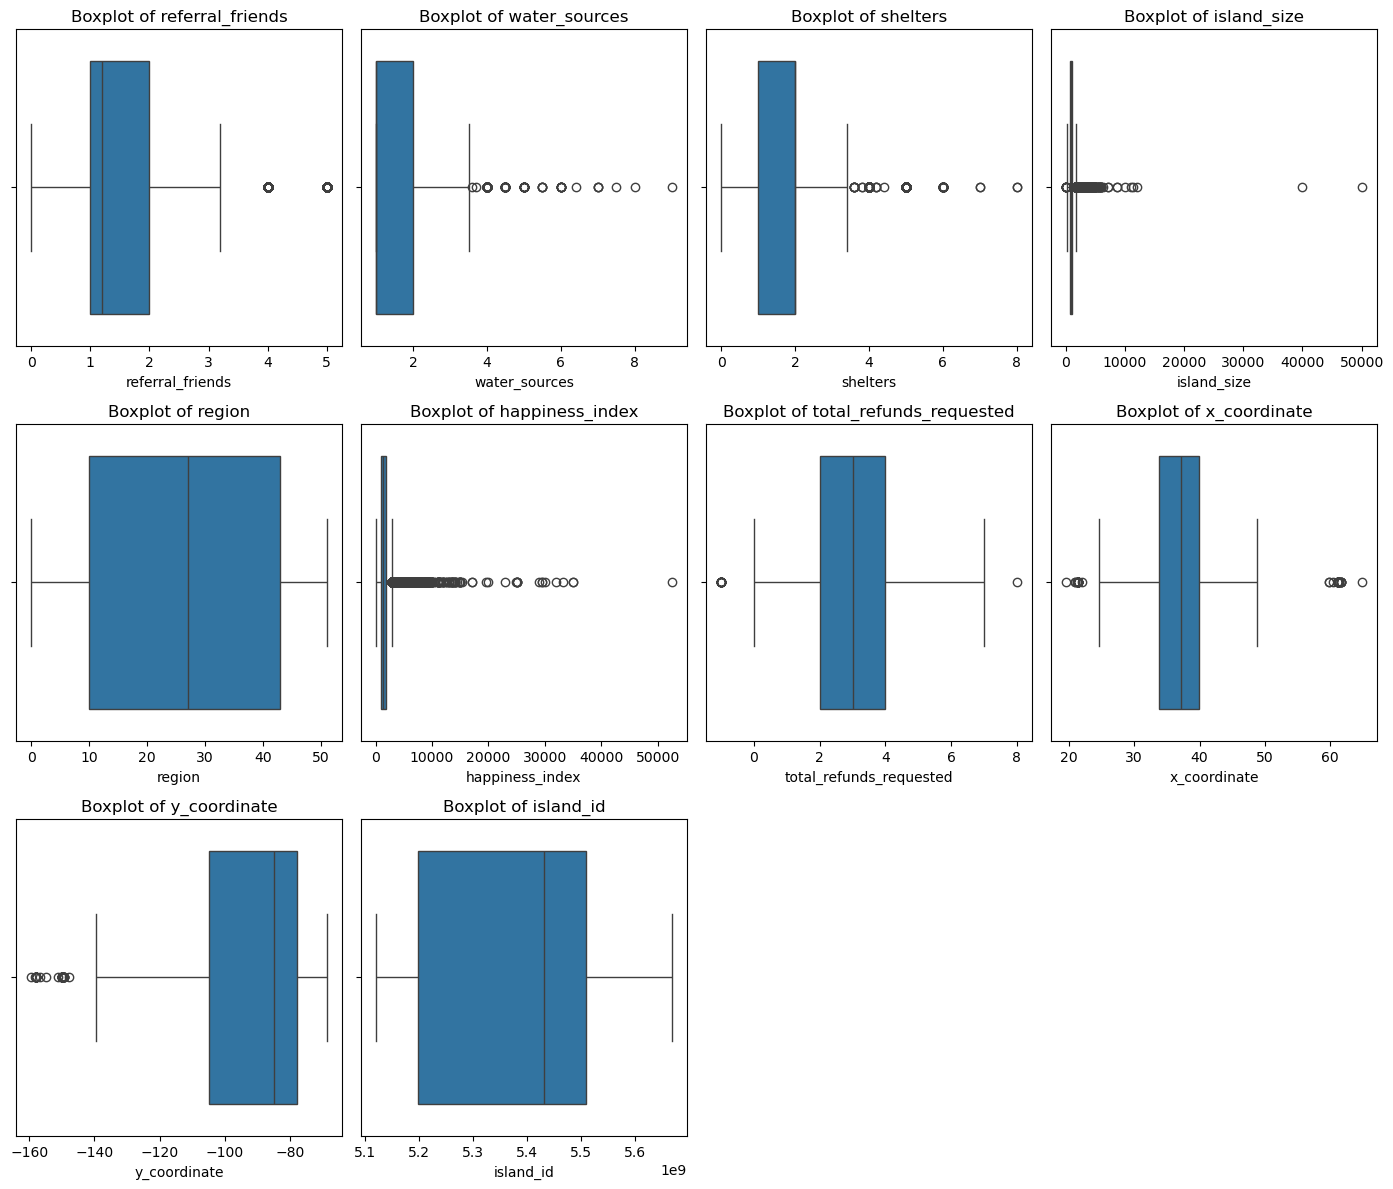

In [25]:
df_cleaned = pd.read_csv("cleaned_euphoria.csv")
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numerical_cols)
num_cols = 4
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols else 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_cleaned, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Upon reviewing the boxplots of the numerical features, we observe several important trends and potential issues in the dataset that need to be addressed before proceeding.

-referral_friends - most of the data is concentrated within a small range, indicating that most islands have a similar number of referral friends. However, there are a few outliers on the higher end.

-water_sources - wimilar to referral_friends, the number of water sources is mostly low, with several islands exhibiting higher values.

-island_size - this feature shows a significant presence of outliers, with a few islands being extremely large compared to the majority. This could indicate rare, large islands or data entry errors.

-happiness_index - the happiness index, which is our target variable, shows several outliers on the higher end. While the majority of islands have happiness levels around a certain range, there are islands with much higher happiness scores. These outliers could be indicative of specific conditions or policies that lead to unusually high happiness scores.

-total_refunds_requested, x_coordinate and y_coordinate also contain a number of outliers.

-island_id - the island_id feature is a unique identifier for each island and is not intended to be used as a predictive feature. This column does not have any predictive power and can introduce noise if included in the model. Therefore, we will drop the island_id feature from the dataset to avoid any unnecessary complexity and to ensure the integrity of the machine learning models.


In [26]:
df_cleaned = pd.read_csv("cleaned_euphoria.csv")
columns_to_drop = ['island_id']
df_cleaned.drop(columns=columns_to_drop, inplace=True)
df_cleaned.to_csv("cleaned_euphoria.csv", index=False)

In [27]:
df_cleaned = pd.read_csv("cleaned_euphoria.csv")
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'island_id' in numerical_cols:
    numerical_cols.remove('island_id')
Q1 = df_cleaned[numerical_cols].quantile(0.25)
Q3 = df_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_cleaned[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_cols] > (Q3 + 1.5 * IQR)))
print(outliers)
df_cleaned.to_csv("cleaned_euphoria.csv", index=False)

       referral_friends  water_sources  shelters  island_size  region  \
0                 False          False     False        False   False   
1                 False          False     False        False   False   
2                 False          False     False        False   False   
3                 False          False     False        False   False   
4                 False          False     False        False   False   
...                 ...            ...       ...          ...     ...   
89450             False          False     False        False   False   
89451             False          False     False        False   False   
89452             False          False     False        False   False   
89453             False          False     False        False   False   
89454             False          False     False        False   False   

       happiness_index  total_refunds_requested  x_coordinate  y_coordinate  
0                False                    Fal

All values are marked as False: This means that none of the data points are outliers according to the method. For each column, the fact that all values are False suggests that the values fall within the expected range of typical values based on the IQR threshold. Therefore, no extreme or unusual values are present in these columns that would require handling.

*Pair plots* visualize relationship between features, can be ideal for detecting relationships or patterns between features, and identifying outliers if any left and trends. But because it would be overwhelming to plot all pairs, we will do so only for the ones who have top positive and top negative corelation with happines_index

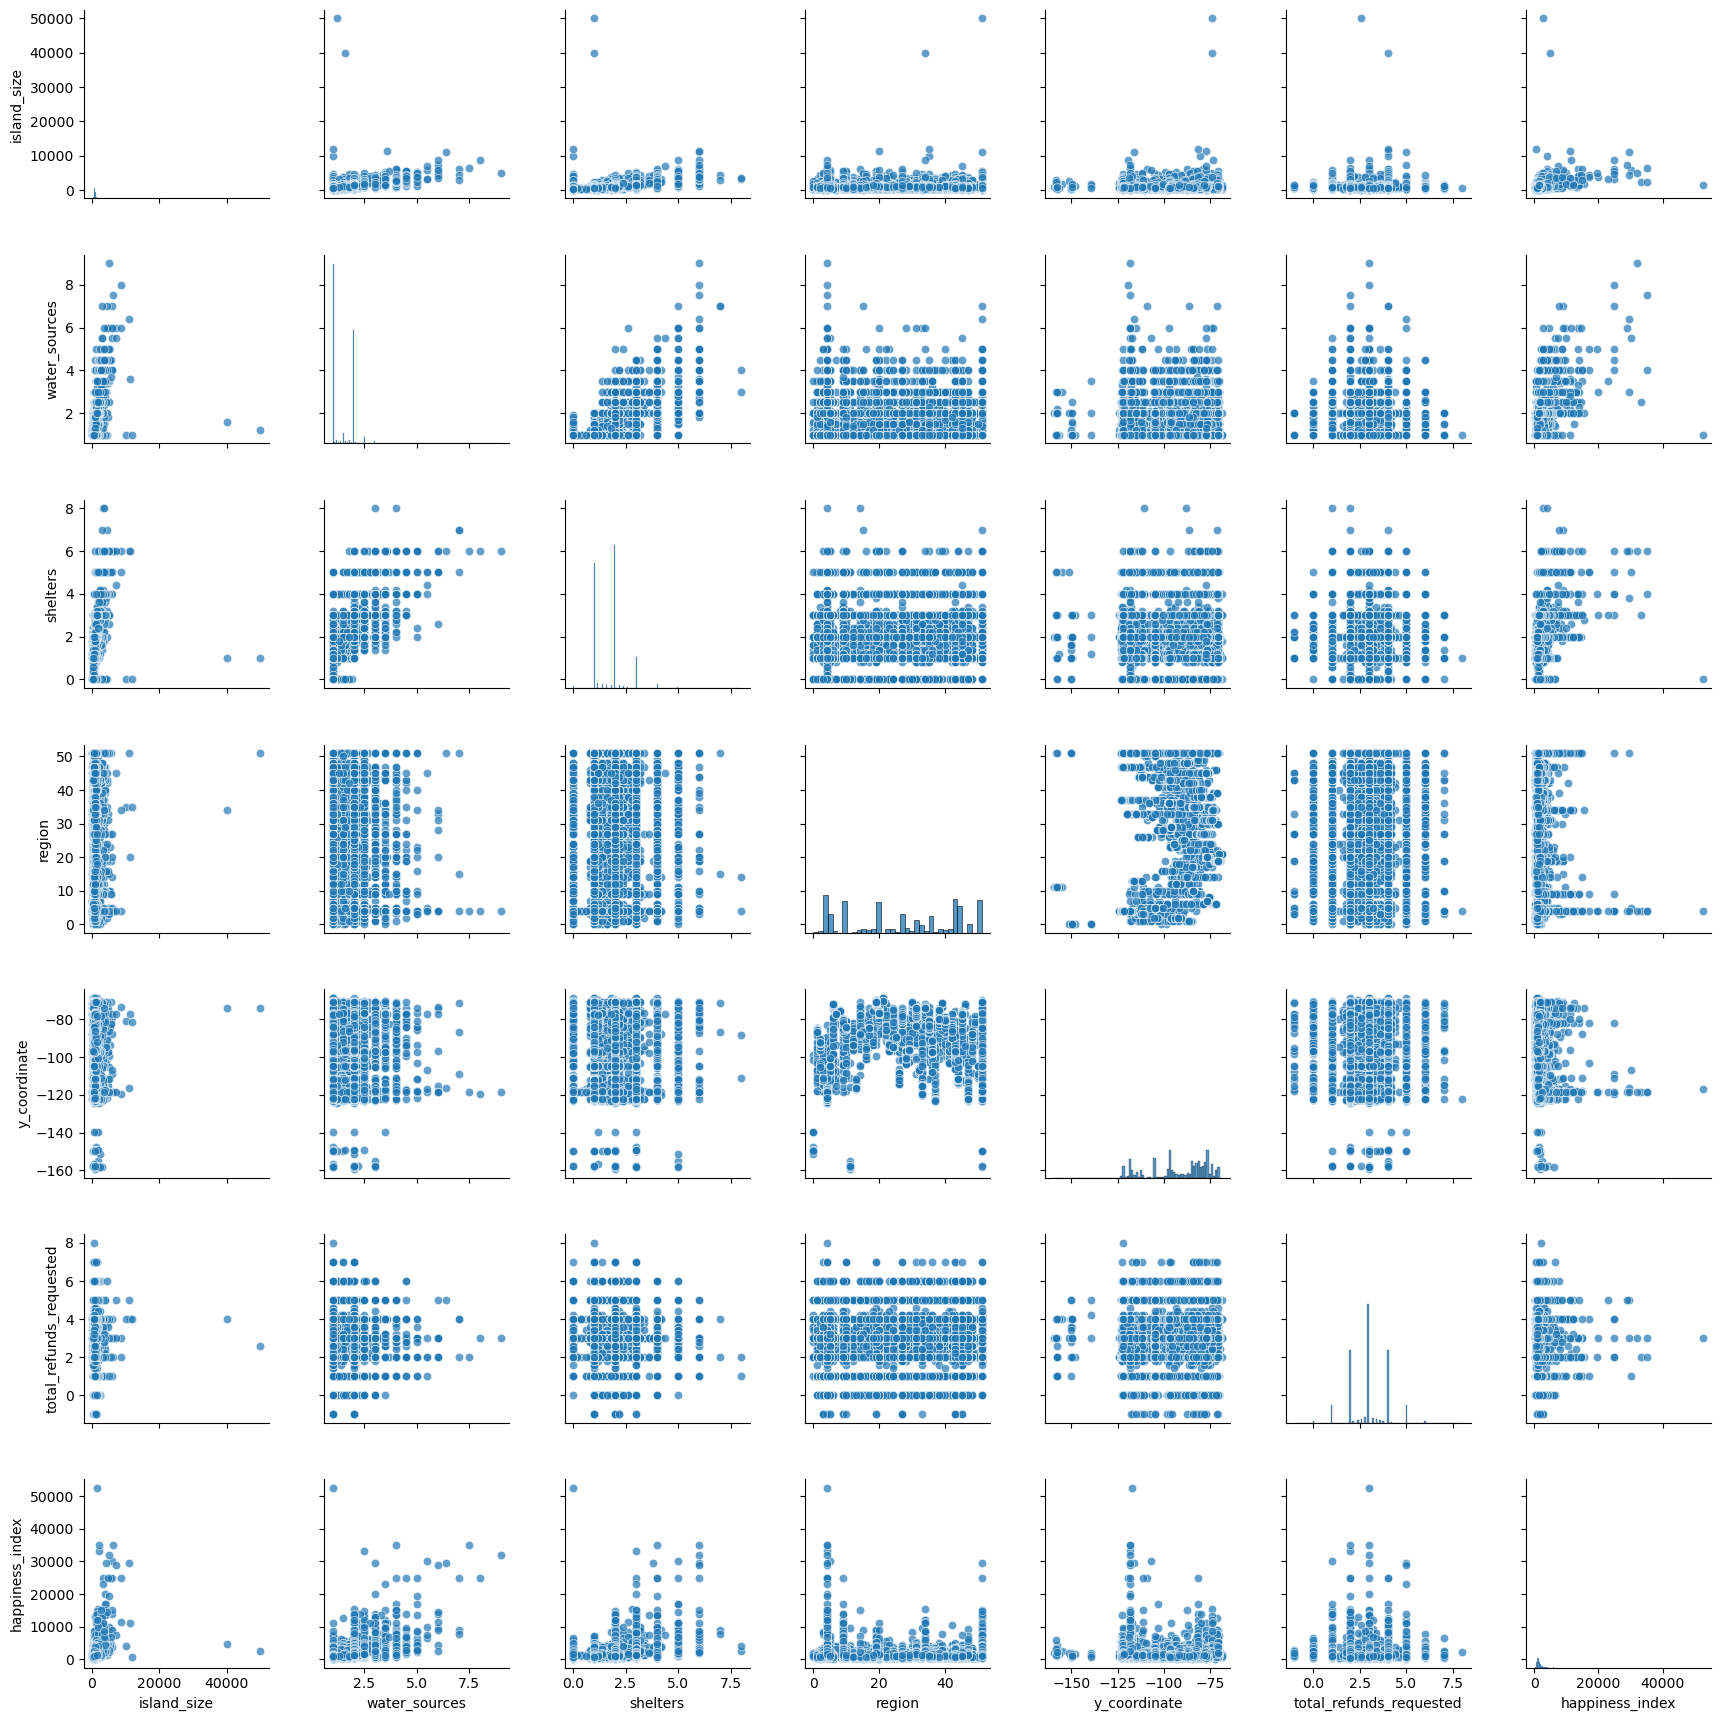

In [28]:
df_cleaned = pd.read_csv("cleaned_euphoria.csv")
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_cleaned[numerical_cols].corr()
target_col = 'happiness_index'
top_positive = correlation_matrix[target_col].sort_values(ascending=False).index[1:4]
top_negative = correlation_matrix[target_col].sort_values().index[:3]
important_features = list(top_positive) + list(top_negative)
important_features.append(target_col)
sns.pairplot(df_cleaned[important_features], height=2.5, aspect=1, plot_kws={'alpha': 0.7})
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

-The removal of outliers has helped make the relationships more interpretable by removing extreme values that may skew the plots. For example, happiness_index now shows less dispersion, discrete variables like region or shelters seem less noisy.

-happines_index appears positively correlated with island_size, as larger islands might offer more amenities contributing to happiness.

-total_refunds_equested shows variability but little correlation with happiness_index, suggesting refunds might not directly affect happiness significantly, we will further explore this with the correlation matrix.

*10.Correlation heatmap*
-A heatmap will be generated to show correlations between numerical features, to identify strongly correlated features that might influence the target variable or require feature engineering.

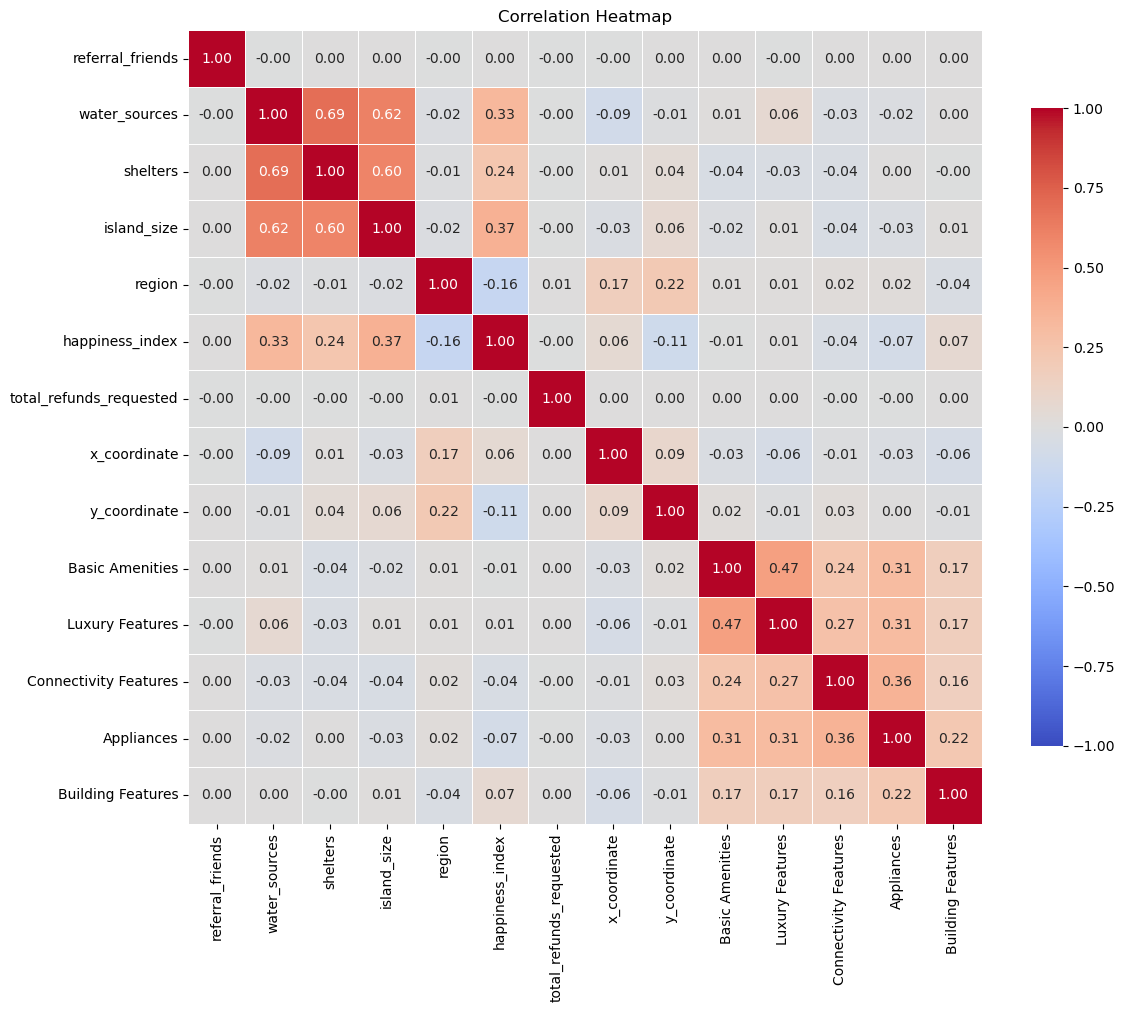

In [29]:
df_cleaned = pd.read_csv("cleaned_euphoria.csv")
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

-When analyzing the correlation matrix, we should to drop columns with low correlation with the target variable (happiness_index), as they may not provide meaningful information for prediction. If a feature has zero correlation with the target variable, it means that there is no linear relationship, and it may not contribute to improving the model's performance.

-In this case referral_friends, total_refunds_requested have correlation 0 with happines_index, so we drop them.

In [30]:
df_cleaned = pd.read_csv("cleaned_euphoria.csv")
columns_to_drop = ['referral_friends', 'total_refunds_requested']
df_cleaned.drop(columns=columns_to_drop, inplace=True)
df_cleaned.to_csv("cleaned_euphoria.csv", index=False)

*11.Distribution plots*
-Distribution plots will visualize the spread of values in numerical columns, to help us understand the distribution (normal, skewed...) of each feature.

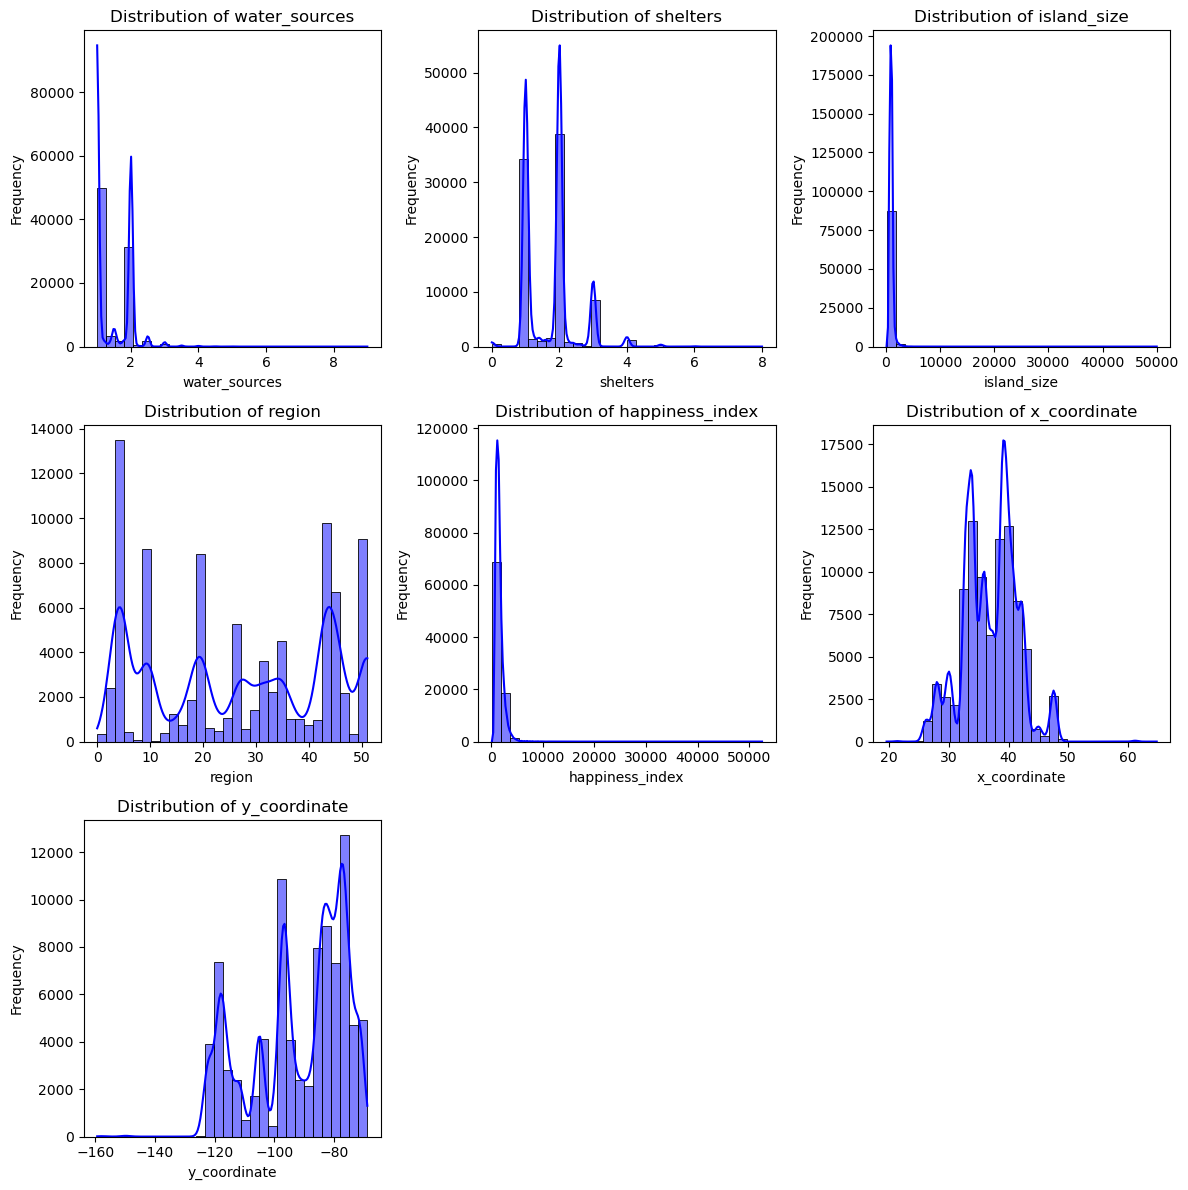

In [31]:
df_cleaned = pd.read_csv("cleaned_euphoria.csv")
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

-The skewness in water_sources, shelters, and island_size suggests that many islands lack ample resources, which may impact happiness_index.

-The clustering in region and x_coordinate suggests geographic or regional patterns.

-The happiness_index distribution indicates a possible association between resources and happiness.

-The dataset was cleaned by handling missing values, dropping unnecessary columns, and imputing missing data for relevant columns. Afterward, categorical columns like region and happiness_metric were label-encoded into numerical values using LabelEncoder. The encoding process successfully transformed these features, enabling them to be used in machine learning models. The region column, which previously contained categorical values representing different regions, is now represented by integers. This transformation prepares the dataset for modeling and analysis.

**Defining the problem**

-In this context, regression is used to predict the happiness index based on various features of the islands, such as amenities, island size, and geographical coordinates. The goal is to understand the relationship between these factors and the happiness index, enabling predictions of happiness levels for new or unseen islands based on their characteristics.

*Splitting the dataset in Train and Test sets*

-Before proceeding with the models, we need to split the dataset into training and testing sets. The training set will be used to train the models, and the test set will be used for final evaluation.

In [32]:
file_path = "cleaned_euphoria.csv"
cleaned_euphoria = pd.read_csv(file_path)
X = cleaned_euphoria.drop('happiness_index', axis=1)
y = cleaned_euphoria['happiness_index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (71564, 11)
Test data shape: (17891, 11)


-This means that the training set has 71,564 rows (samples) and 11 columns (features). The 11 columns include both the features and the target variable.
-The test set has 17,891 rows (samples) and 12 columns (features). Again, the 12 columns include both the features and the target variable.

*Creating a validation set from the training data*
-To avoid overfitting, we’ll create a validation set (20% of the training set) to evaluate the model before testing it on the final test set. This will help in tuning the hyperparameters

In [35]:
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("New Training data shape:", X_train_new.shape)
print("Validation data shape:", X_val.shape)

New Training data shape: (57251, 11)
Validation data shape: (14313, 11)


-X_train_new and y_train_new will be used for training the model.

-X_val and y_val will be used for validation during model training.

-This gives an 80/20 split of the original training set, where 20% of it is now used for validation.

*9.Feature scalling*
-Numerical features are standardized to have a mean of 0 and a standard deviation of 1, it prevents features with larger ranges from dominating the model's training.

In [36]:
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train_numerical = X_train[numerical_cols]
X_test_numerical = X_test[numerical_cols]
X_val_numerical = X_val[numerical_cols]

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)
X_val_scaled = scaler.transform(X_val_numerical)

scaling_results = pd.DataFrame({
    "Dataset": ["Training", "Test", "Validation"],
    "Mean": [X_train_scaled.mean(axis=0).mean(),
             X_test_scaled.mean(axis=0).mean(),
             X_val_scaled.mean(axis=0).mean()],
    "Std": [X_train_scaled.std(axis=0).mean(),
            X_test_scaled.std(axis=0).mean(),
            X_val_scaled.std(axis=0).mean()]
})

print(scaling_results)

      Dataset          Mean       Std
0    Training  1.554515e-16  1.000000
1        Test -3.060707e-04  1.050635
2  Validation -1.041745e-02  0.991072


-The data was first split into training, testing, and validation sets, ensuring that the model would be evaluated on unseen data. To prevent data leakage, feature scaling was applied only on the training data using the `fit_transform()` method of the StandardScaler. This step calculated the mean and standard deviation of the training data and scaled it accordingly. The same scaler, now fitted to the training set, was then applied to the test and validation data using the `transform()` method, ensuring consistency in feature scaling without contaminating the test or validation data with information from the training set.

-The scaling results show that the mean of the scaled training data is close to zero, as expected, with a standard deviation of exactly 1, indicating successful normalization. The test and validation datasets show similar characteristics, with slightly different means and standard deviations due to their inherent differences but still within an acceptable range. The small mean values in the test and validation sets suggest that the scaling has been applied correctly and consistently across all datasets. Overall, this process ensures that the model receives properly scaled input, allowing it to learn effectively without bias toward any particular feature's scale.

**Selecting models**

-In this task, we use regression to predict the "happiness index" of the islands, as it is a continuous variable that quantifies the well-being of each island. Linear regression helps establish a relationship between the island's features (like amenities, size, and location) and the happiness index, providing a simple but effective model for prediction. Random Forest, a more complex ensemble model, can capture non-linear relationships and interactions between features, which could be important for understanding how different island attributes combine to affect happiness levels. Additionally, we could use a model like Support Vector Regression (SVR), which is well-suited for high-dimensional datasets and can handle non-linear relationships effectively, providing another perspective on predicting the happiness index. By using a combination of these models, we can ensure robustness in the predictions and account for both linear and complex patterns in the data.

We will train all models on the cleaned dataset, see which one performs the best, than use cross-validation for hyperparameter tuning and train the best model. At the end we will compare the results the model offered before and after tuning.

*Defining the models*

-We define three different regression models for our machine learning task

-These three models represent a variety of approaches, from linear to non-linear, and are commonly used in regression tasks to predict continuous outcomes like the "happiness_index" in this case.

In [37]:
lr = LinearRegression()
svr = SVR()
rf = RandomForestRegressor(random_state=42)

*Evaluating the initial model performances*

-We will first train the models than use the mean_squared_error (MSE) and R-squared (R²) to evaluate the performance of all models. This will give an understanding of how well each model performs without any hyperparameter tuning.

In [38]:
models = [lr, svr, rf]
X_train_new = X_train_scaled
y_train_new = y_train
X_val_new = X_val_scaled
y_val_new = y_val

for model in models:
    model.fit(X_train_new, y_train_new)

    y_train_pred = model.predict(X_train_new)
    y_val_pred = model.predict(X_val_new)

    train_mse = mean_squared_error(y_train_new, y_train_pred)
    train_r2 = r2_score(y_train_new, y_train_pred)

    val_mse = mean_squared_error(y_val_new, y_val_pred)
    val_r2 = r2_score(y_val_new, y_val_pred)

    print(f"{model.__class__.__name__} Results:")
    print(f"Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
    print(f"Validation MSE: {val_mse:.4f}, Validation R²: {val_r2:.4f}")
    print("-" * 40)

LinearRegression Results:
Training MSE: 629291.1379, Training R²: 0.2126
Validation MSE: 682708.1118, Validation R²: 0.2011
----------------------------------------
SVR Results:
Training MSE: 615721.6336, Training R²: 0.2296
Validation MSE: 667321.3802, Validation R²: 0.2191
----------------------------------------
RandomForestRegressor Results:
Training MSE: 34797.5485, Training R²: 0.9565
Validation MSE: 41722.8119, Validation R²: 0.9512
----------------------------------------


-Linear Regression - Both R² scores are low, suggesting underfitting, this indicates that the model is too simple to capture the complexities in the data. The model also performs poorly on unseen data, suggesting that linear regression is not a good fit for this dataset.

-Support Vector Regressor - Marginally better than Linear Regression, but still suffers from underfitting, as R² values are low. The model's performance on the validation set is similar to its training performance, indicating that it may be overfitting or simply not generalizing well.

-Random Forrest - Excellent performance on both training and validation sets. High R² and low MSE indicate that the model is well-fitted and generalizes well. No signs of overfitting, as the training and validation scores are close.

*Bar Plots for R2 and MSE score*

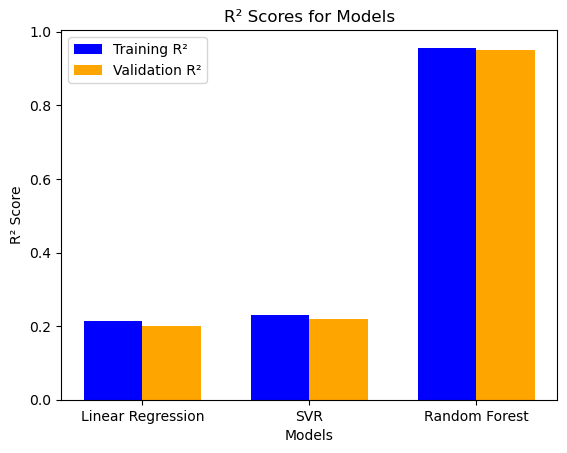

In [39]:
models = ['Linear Regression', 'SVR', 'Random Forest']
train_r2 = [0.2126, 0.2296, 0.9565]
val_r2 = [0.2011, 0.2191, 0.9512]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_r2, width, label='Training R²', color='blue')
plt.bar(x + width/2, val_r2, width, label='Validation R²', color='orange')

plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('R² Scores for Models')
plt.xticks(x, models)
plt.legend()
plt.show()


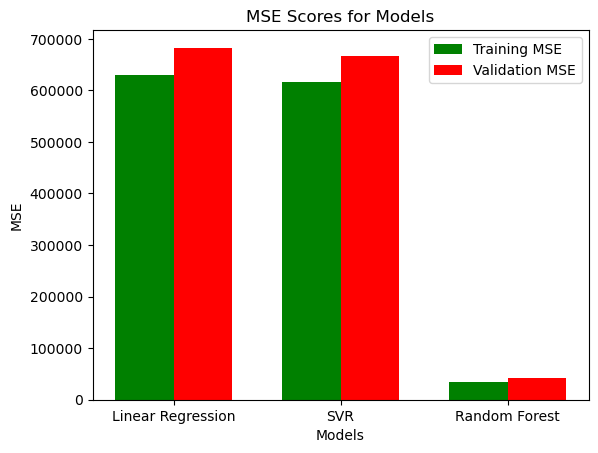

In [40]:
train_mse = [629291.1379, 615721.6336, 34797.5485]
val_mse = [682708.1118, 667321.3802, 41722.8119]

plt.bar(x - width/2, train_mse, width, label='Training MSE', color='green')
plt.bar(x + width/2, val_mse, width, label='Validation MSE', color='red')

plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Scores for Models')
plt.xticks(x, models)
plt.legend()
plt.show()

Random Forest Regressor clearly outperforms the other models in terms of both MSE and R² scores. It captures the data's complexities without overfitting. We can confirm this with the plots. Random Forest Regressor is the best model to use for predicting the happiness index. It shows both high accuracy and generalization ability. Further fine-tuning of its parameters can potentially enhance its performance.

*Hyperparameter tuning*

-We'll use RandomizedSearchCV to test various combinations of hyperparameters for the Random Forest model.

-n_estimators is the number of decision trees in the forest.

-max_depth is the maximum depth of each tree, it controls how complex each tree can become.

-min_samples_split is the minimum number of samples required to split an internal node.

-min_samples_leaf is the minimum number of samples required to be at a leaf node.

-max_features is the number of features to consider when looking for the best split.

-bootstrap, whether to use bootstrapping when sampling data for training.

-This randomly samples hyperparameter combinations, which reduces the time and computational cost compared to trying all combinations in GridSearchCV. This approach still gives a good approximation of the best hyperparameters.

In [41]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, 30, None], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],   
    'max_features': ['sqrt'],  
    'bootstrap': [True, False]  
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  
    scoring='neg_mean_squared_error', 
    cv=3,  
    n_jobs=1,  
    verbose=0,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best CV MSE score: ", -random_search.best_score_)

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best CV MSE score:  242250.27646674574


Based on the output of the process, the best hyperparameters for the Random Forest model are:

n_estimators: 100, it will use 100 trees in the forrest.

min_samples_split: 5, each internal node in the decision trees will only split if there are at least 5 samples in the node. This helps prevent the trees from becoming too specific to the training data.

min_samples_leaf: 2, by setting it to 2, the model ensures that no leaf node contains fewer than 2 samples

max_features: 'sqrt', for each split in the decision trees, only the square root of the total number of features is considered. This random feature selection helps increase model diversity and prevents overfitting by reducing the correlation between the individual trees.

max_depth: None, this means the tree is grown fully until all leaves are pure or contain less than min_samples_split samples.

bootstrap: False, indicating that the model is not using bootstrap sampling for the trees, but instead, it uses the entire dataset.

Best Model Evaluation:
Best CV MSE (Mean Squared Error): 242250.28, relatively moderate, which indicates that the model is performing somewhat well on cross-validation.

*Training the model*

-Now that we have identified the best hyperparameters from the RandomizedSearchCV process, we will retrain the Random Forest model using those optimal parameters. This way, we ensure that the model is using the best configuration to learn from the training data.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best_rf = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=None,
    bootstrap=False,
    random_state=42
)

best_rf.fit(X_train_scaled, y_train)

y_test_pred = best_rf.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test R²: {test_r2:.4f}")


Test MSE: 206967.1458
Test RMSE: 454.9364
Test MAE: 212.7307
Test R²: 0.7491


-Test MSE: The test MSE of 206,967.1458 indicates a moderate error, suggesting that while the model's predictions are somewhat off, the result is typical for complex prediction tasks. 

-Test RMSE: The test RMSE of 454.9364 indicates that, on average, the model's predictions are off by around 454 units, which is a reasonable level of error for this kind of regression task.  

-Test MAE: The test MAE of 212.7307 shows that most of the model's predictions are within 213 units of the actual values, suggesting a moderate level of accuracy.  

-Test R²: With a test R² of 0.7491, the model explains approximately 75% of the variance in the target variable, indicating a strong fit and that it captures most of the relevant patterns in the data.

Overall, the Random Forest model performs well, with good predictive accuracy and a solid fit to the test data, suggesting it is effective at predicting the happiness index.

*Plotting the learning curve*

-The learning curve is generated based on cross-validation scores across different training set sizes. The learning curve provides a broader view of how the model performs with varying amounts of training data, by evaluating it using cross-validation.

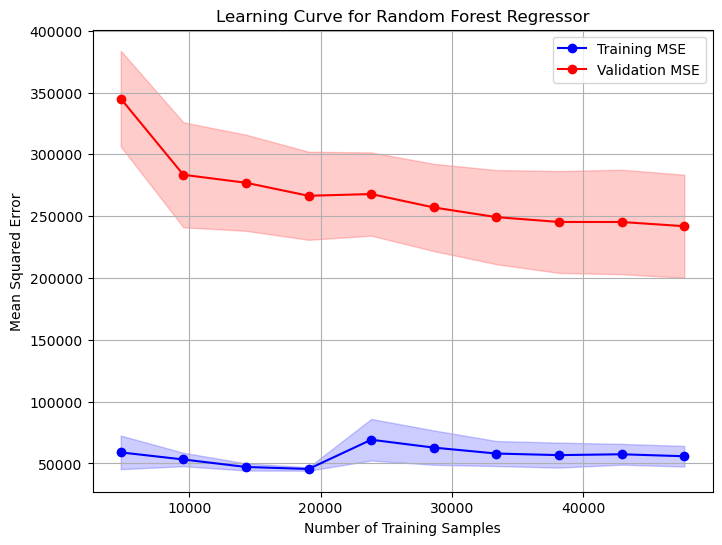

In [43]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_rf,
    X=X_train_scaled,
    y=y_train,
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
    cv=3,  
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1) 
train_scores_std = train_scores.std(axis=1)
val_scores_std = val_scores.std(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training MSE', color='blue', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation MSE', color='red', marker='o')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.title('Learning Curve for Random Forest Regressor')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

*Observations from the learning curve*

-Training Error:

The training error remains low and stable across all training set sizes. This behavior is expected for Random Forest, as it typically overfits on training data due to its ensemble of decision trees. This indicates that the model fits the training data well.

-Validation Error:

The validation error decreases as the training set size increases, stabilizing around a certain point. The gap between the training and validation error indicates some level of overfitting. However, the decreasing validation error suggests that adding more data might help reduce the overfitting.

-Gap Between Training and Validation Error:

A noticeable gap exists between the training and validation curves, which could imply that the model is overfitting, is performing significantly better on the training set than on unseen data. It can also imply data complexity, that the target variable might be influenced by factors not included in the features.

-Shaded Areas (Variance):

The shaded area around the validation curve represents the variance in validation scores. The variance appears to narrow as the training size increases, suggesting that the model becomes more stable and reliable with more data.

In [ ]:
*Evaluating model performance*

*Plotting the residuals*

-Plotting residuals helps assess how well the model fits the data and whether any patterns exist that the model hasn't captured. Residuals are the differences between the actual values and the predicted values. This plot wii show the residuals plotted against the index of data points.

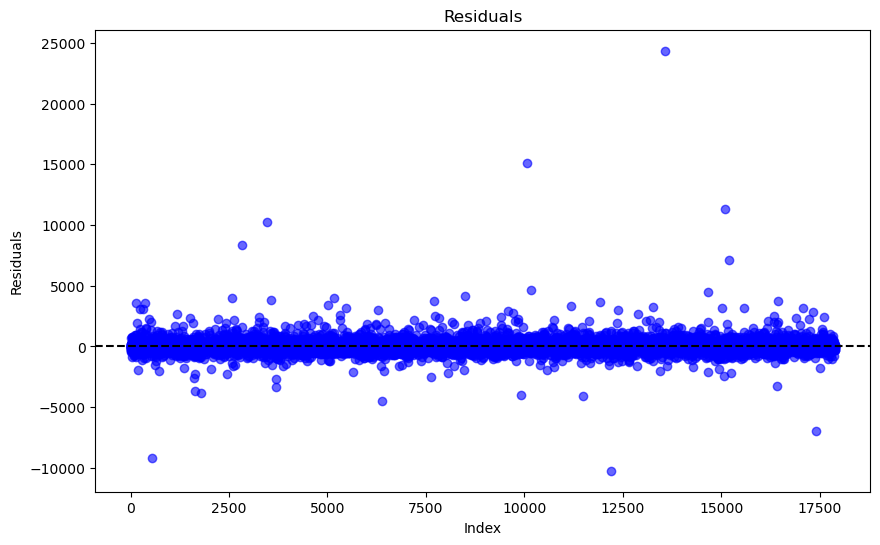

In [45]:
y_pred = best_rf.predict(X_test_scaled)

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

-The residuals are mostly centered around zero, but there are some outliers with large residuals, so while most predictions are accurate, the model struggles with a few data points, possibly indicating cases that are hard to predict or have unique characteristics not captured well by the model.

*Histogram of residuals*

- This will show the frequency distribution of residuals.

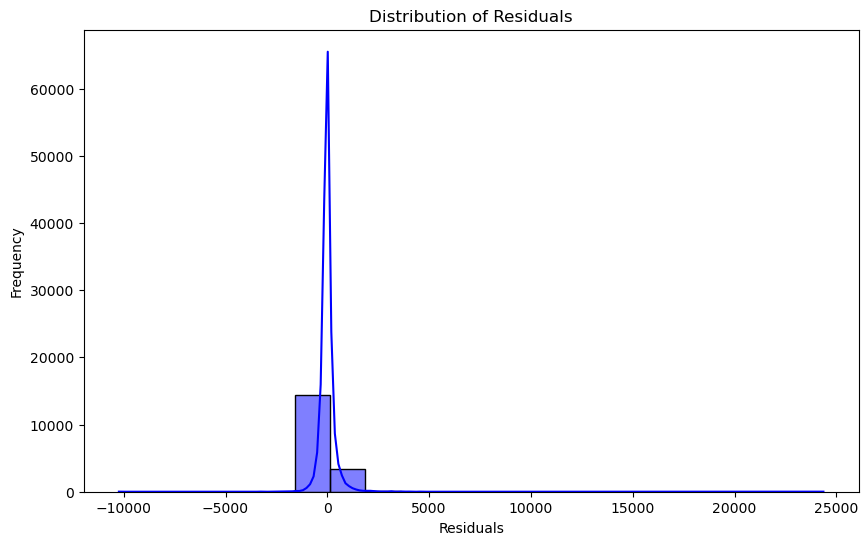

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

-The residuals are skewed slightly to the right, with most values clustered around zero but some high positive residuals. A good model should have residuals distributed symmetrically around zero. The slight skewness indicates that the model overpredicts for some cases.

*Residuals versus predicted values scatter plot*

-It shows the relationship between residuals and predicted values.

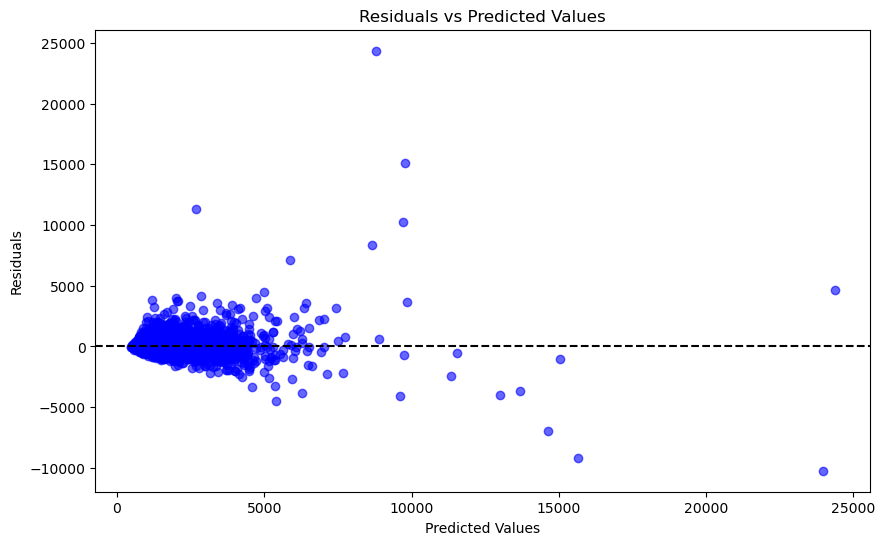

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

-The residuals are distributed somewhat evenly across predicted values, but there are a few significant deviations for larger predicted values. Ideally, residuals should form a random scatter with no discernible pattern. Here, the spread increases for higher predicted values, suggesting potential heteroscedasticity meaning that the variance of residuals increases with predicted value.

*Feature importance*

-Feature importance is used to understand the contribution of each feature in predicting the target variable. It is crucial in model interpretability, especially for models like Random Forests that consist of multiple decision trees. In these models, feature importance indicates how much each feature helps reduce uncertainty or "impurity" in the model's decisions. Knowing which features are most influential will help us understand how the model makes predictions.

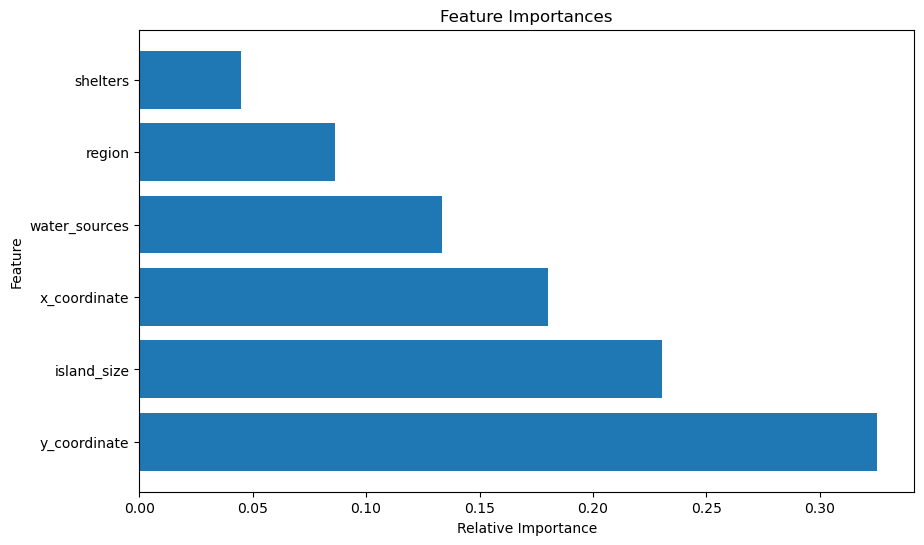

In [49]:
importances = best_rf.feature_importances_

indices = np.argsort(importances)[::-1]

features = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(features[indices], importances[indices], align="center")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()

-The feature y_coordinate holds the highest relative importance, contributing significantly more to the model predictions compared to others. This suggests that the spatial location captured by y_coordinate plays a crucial role in the happines_index.

-The second most important feature is island_size, indicating that the physical size of the island has a strong influence on the model.

-The low importance of shelters might indicate that shelter availability is either uniform across islands, meaning it doesn’t explain much variance in happiness or it is more poorly represented or measured in the dataset 

*Comparing the performance of the initial model versus the trained model*

-A comparison of model performance metrics at different stages of training, validation, and testing. It evaluates the Mean Squared Error (MSE) and R² (R-squared) values for the Random Forest model.

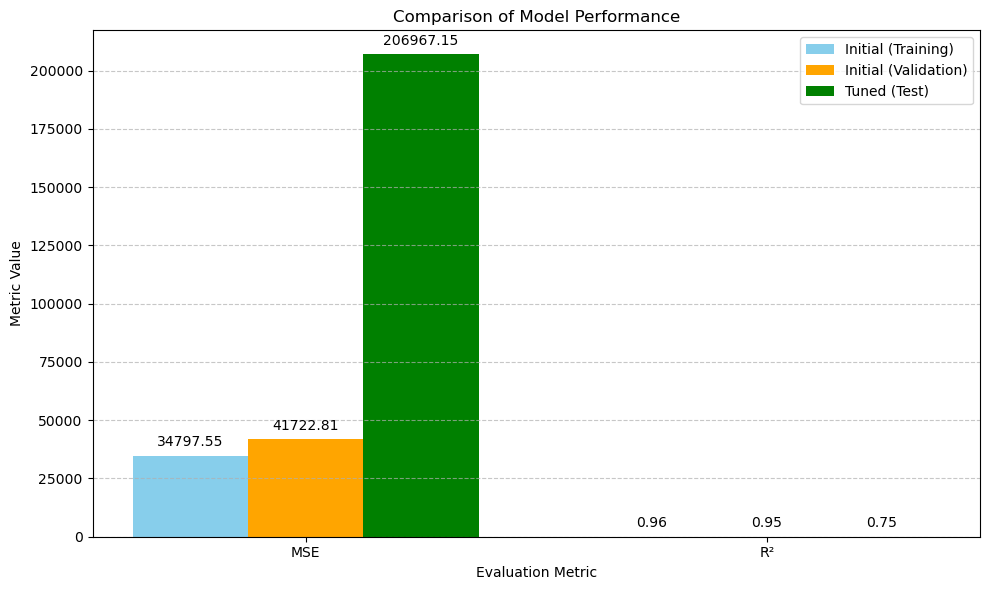

In [50]:
initial_training_mse = 34797.5485
initial_training_r2 = 0.9565
initial_validation_mse = 41722.8119
initial_validation_r2 = 0.9512

tuned_test_mse = 206967.1458
tuned_test_r2 = 0.7491

metrics = ['MSE', 'R²']
initial_values = [initial_training_mse, initial_training_r2]
validation_values = [initial_validation_mse, initial_validation_r2]
tuned_values = [tuned_test_mse, tuned_test_r2]

x = np.arange(len(metrics)) 
width = 0.25 

plt.figure(figsize=(10, 6))
plt.bar(x - width, initial_values, width, label='Initial (Training)', color='skyblue')
plt.bar(x, validation_values, width, label='Initial (Validation)', color='orange')
plt.bar(x + width, tuned_values, width, label='Tuned (Test)', color='green')

plt.xlabel('Evaluation Metric')
plt.ylabel('Metric Value')
plt.title('Comparison of Model Performance')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(metrics)):
    plt.text(x[i] - width, initial_values[i] + 0.02 * max(tuned_values), f"{initial_values[i]:.2f}", ha='center')
    plt.text(x[i], validation_values[i] + 0.02 * max(tuned_values), f"{validation_values[i]:.2f}", ha='center')
    plt.text(x[i] + width, tuned_values[i] + 0.02 * max(tuned_values), f"{tuned_values[i]:.2f}", ha='center')

plt.tight_layout()
plt.show()


-MSE (Mean Squared Error): Initially, the model performed well on training and validation data (low MSE).

-R²: Initial training and validation R² are high, indicating a good fit to the data. The tuned model's R² on the test set is lower, showing reduced predictive power.

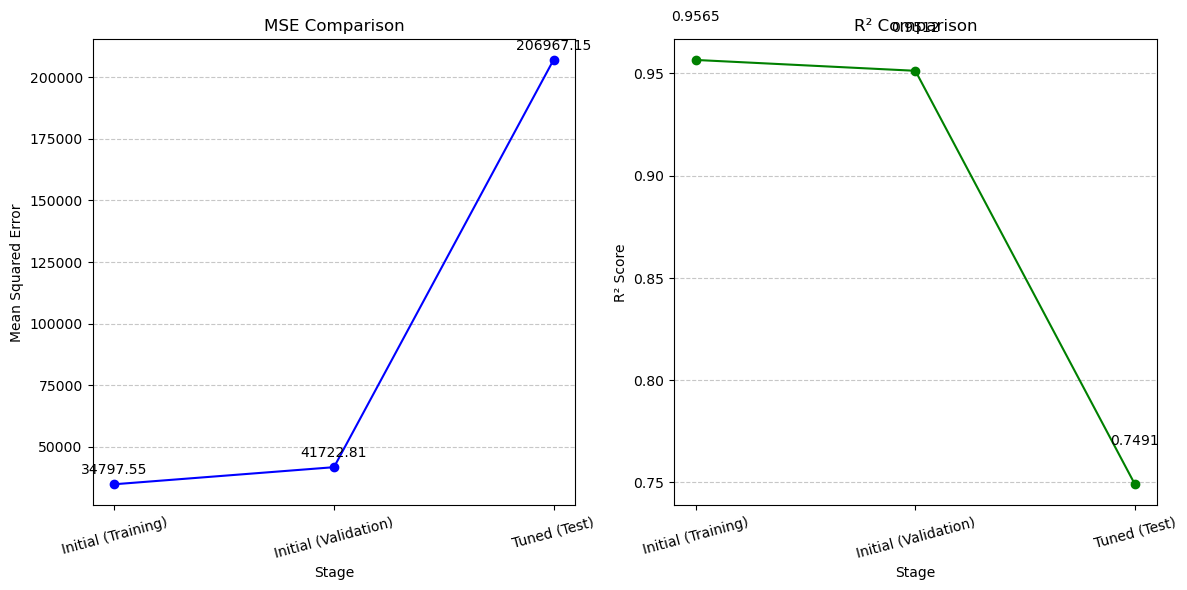

In [51]:
initial_training_mse = 34797.5485
initial_training_r2 = 0.9565
initial_validation_mse = 41722.8119
initial_validation_r2 = 0.9512

tuned_test_mse = 206967.1458
tuned_test_r2 = 0.7491

stages = ['Initial (Training)', 'Initial (Validation)', 'Tuned (Test)']
mse_values = [initial_training_mse, initial_validation_mse, tuned_test_mse]
r2_values = [initial_training_r2, initial_validation_r2, tuned_test_r2]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(stages, mse_values, marker='o', linestyle='-', color='blue', label='MSE')
plt.title('MSE Comparison')
plt.xlabel('Stage')
plt.ylabel('Mean Squared Error')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, val in enumerate(mse_values):
    plt.text(i, val + 0.02 * max(mse_values), f"{val:.2f}", ha='center')
plt.xticks(rotation=15)

plt.subplot(1, 2, 2)
plt.plot(stages, r2_values, marker='o', linestyle='-', color='green', label='R²')
plt.title('R² Comparison')
plt.xlabel('Stage')
plt.ylabel('R² Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, val in enumerate(r2_values):
    plt.text(i, val + 0.02 * max(r2_values), f"{val:.4f}", ha='center')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


-MSE shows a significant increase from the initial model to the tuned test stage due to generalization.

-R² shows a drop from the initial model to the tuned test stage, reflecting the reduced fit on unseen data.